## Data source from [kaggle](https://www.kaggle.com/datasets/borapajo/food-choices/data?select=food_coded.csv)

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data/food_coded.csv")

## Let's start by examining the data and work on cleaning it up if needed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [4]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [5]:
df.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         21
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [6]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [7]:
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

Cleaning up "null" or "non useful" data, starting with Weight and then GPA

In [8]:
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
mean_weight = df['weight'].mean()
df['weight'].fillna(mean_weight, inplace=True)
df['weight'].unique()

array([187. , 155. , 158.5, 190. , 180. , 137. , 125. , 116. , 110. ,
       264. , 123. , 185. , 145. , 170. , 135. , 165. , 175. , 195. ,
       105. , 160. , 167. , 115. , 205. , 128. , 150. , 140. , 120. ,
       100. , 113. , 168. , 169. , 200. , 265. , 192. , 118. , 210. ,
       112. , 130. , 127. , 129. , 260. , 184. , 230. , 138. , 156. ])

Choosing the mean value of the others, since it's only 2 values and it won't skew the data much

In [9]:
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
mean_GPA = round(df['GPA'].mean(), 2)
df['GPA'].fillna(mean_GPA, inplace=True)
df['GPA'].unique()

array([2.4  , 3.654, 3.3  , 3.2  , 3.5  , 2.25 , 3.8  , 3.904, 3.4  ,
       3.6  , 3.1  , 3.42 , 4.   , 2.2  , 3.87 , 3.7  , 3.9  , 2.8  ,
       3.   , 3.65 , 3.89 , 2.9  , 3.605, 3.83 , 3.292, 3.35 , 2.6  ,
       3.67 , 3.73 , 2.71 , 3.68 , 3.75 , 3.92 , 3.77 , 3.63 , 3.882])

In [10]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,158.5
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,158.5
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


I want to add column that changes the numerical value of 1 and 2 for Female and Male and properly name it Sex. 

In [11]:
df['Sex'] = df.Gender.replace({1: 'Female', 2: 'Male'})

In [12]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Sex
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1,1165.0,345,car racing,5,1,1315,187.0,Male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,2,725.0,690,Basketball,4,2,900,155.0,Female
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,2.0,5,1165.0,500,none,5,1,900,158.5,Female
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,2.0,5,725.0,690,NaN,3,1,1315,158.5,Female
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,4,940.0,500,Softball,4,2,760,190.0,Female


In [13]:
df['calories_day'].value_counts(dropna=False)

3.0    63
4.0    23
2.0    20
NaN    19
Name: calories_day, dtype: int64

In [14]:
df['breakfast'].value_counts(dropna=False)


1    111
2     14
Name: breakfast, dtype: int64

In [15]:
df['veggies_day'].value_counts(dropna=False)


5    53
4    37
3    21
2    11
1     3
Name: veggies_day, dtype: int64

In [16]:
df['sports'].value_counts(dropna=False)

1.0    75
2.0    48
NaN     2
Name: sports, dtype: int64

In [17]:
df['sports'] = pd.to_numeric(df['sports'], errors='coerce')
mean_sports = df['sports'].mean()
mean_sports

1.3902439024390243

1.39 is closer to yes than no, so we are going to just put in 1 for those values

In [18]:
df['sports'].fillna(1, inplace=True)
df['sports'].unique()

array([1., 2.])

In [19]:
df['sports'].value_counts(dropna=False)

1.0    77
2.0    48
Name: sports, dtype: int64

In [20]:
df['do_sports'] = df.sports.replace({1: 'Yes', 2: 'No'})

In [21]:
df['self_perception_weight'].value_counts()

3.0    45
2.0    31
4.0    31
1.0     6
5.0     6
6.0     5
Name: self_perception_weight, dtype: int64

In [22]:
df_cleaned = df[['GPA', 'Sex', 'weight', 'do_sports', 'self_perception_weight']]

In [23]:
df_cleaned.head()

,GPA,Sex,weight,do_sports,self_perception_weight
0,2.400,Male,187.0,Yes,3.0
1,3.654,Female,155.0,Yes,3.0
2,3.300,Female,158.5,No,6.0
3,3.200,Female,158.5,No,5.0
4,3.500,Female,190.0,Yes,4.0


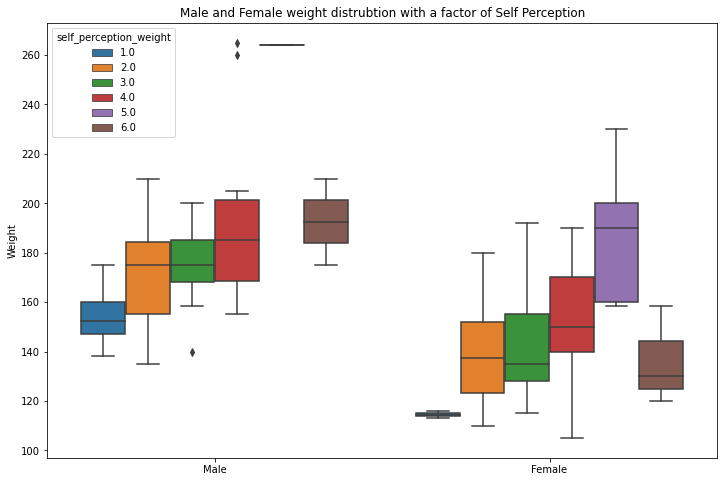

In [24]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Sex', y='weight', hue='self_perception_weight', data=df_cleaned)

plt.title('Male and Female weight distrubtion with a factor of Self Perception')
plt.xlabel('')
plt.ylabel('Weight')
plt.show()

In [25]:
MALE_DATA = df_cleaned[(df['Sex'] == 'Male')]
FEMALE_DATA = df_cleaned[(df['Sex'] == 'Female')]


In [26]:
FEMALE_DATA['Sex'].unique()[0]

'Female'

In [27]:
def sex_based_weight_perception(data):
    plt.figure(figsize=(12,8))

    sns.boxplot(x='Sex', y='weight', hue='self_perception_weight', data=data)

    plt.title(f'{data.Sex.unique()[0]} weight distrubtion with a factor of Self Perception')
    plt.xlabel('')
    plt.ylabel('Weight')
    plt.show()

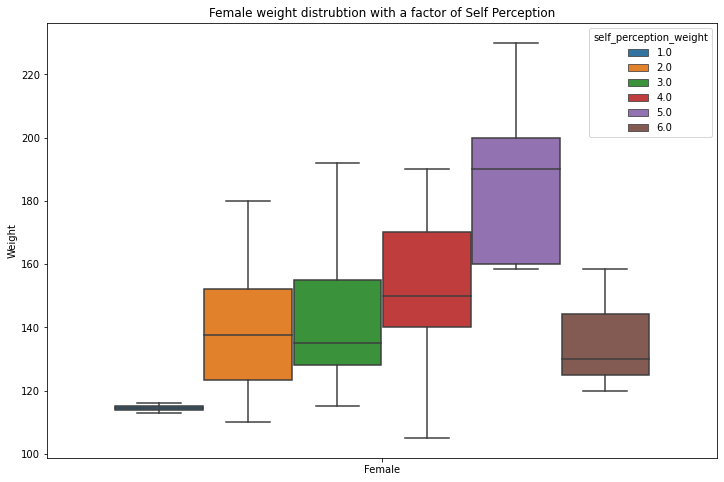

In [28]:
sex_based_weight_perception(FEMALE_DATA)

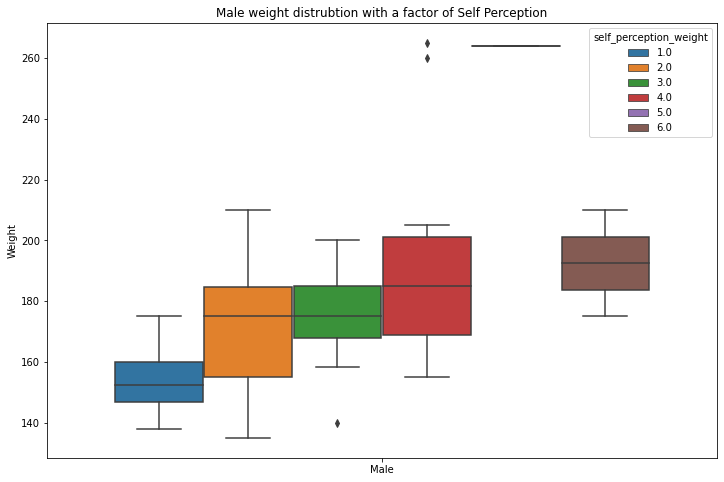

In [29]:
sex_based_weight_perception(MALE_DATA)

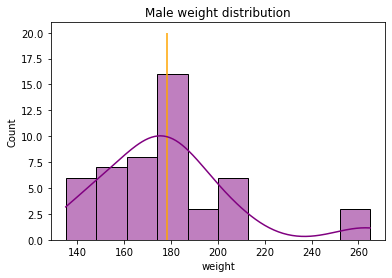

In [30]:
weight_mean = MALE_DATA['weight'].mean()

sns.histplot(x='weight', data=MALE_DATA, kde=True, color='purple')
plt.title('Male weight distribution')
plt.vlines(weight_mean, ymin=0, ymax=20, color='orange')
plt.show()

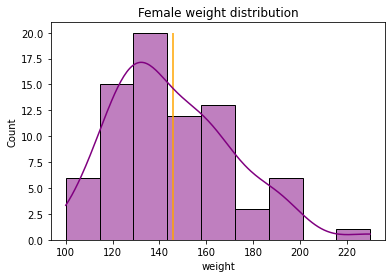

In [31]:
weight_mean = FEMALE_DATA['weight'].mean()

sns.histplot(x='weight', data=FEMALE_DATA, kde=True, color='purple')
plt.title('Female weight distribution')
plt.vlines(weight_mean, ymin=0, ymax=20, color='orange')
plt.show()

In [32]:
df_cleaned['GPA'].unique()

array([2.4  , 3.654, 3.3  , 3.2  , 3.5  , 2.25 , 3.8  , 3.904, 3.4  ,
       3.6  , 3.1  , 3.42 , 4.   , 2.2  , 3.87 , 3.7  , 3.9  , 2.8  ,
       3.   , 3.65 , 3.89 , 2.9  , 3.605, 3.83 , 3.292, 3.35 , 2.6  ,
       3.67 , 3.73 , 2.71 , 3.68 , 3.75 , 3.92 , 3.77 , 3.63 , 3.882])

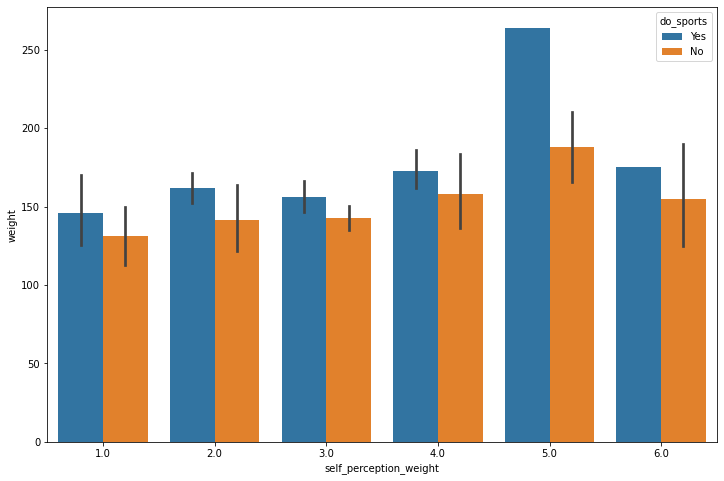

In [33]:
plt.figure(figsize=(12,8))

sns.barplot(data=df_cleaned, y='weight', x='self_perception_weight', hue='do_sports')

plt.show()

H'0 = Kids who plays sports don't have a better perception of themselves than kids that don't play sports\
H'A = Kids who play sports have a better perception about their weights than kids that don't play sports\
confidence_level = 0.05

In [45]:
SPORTERS = df_cleaned[(df_cleaned['do_sports'] == 'Yes')]
NO_SPORTERS = df_cleaned[(df_cleaned['do_sports'] == 'No')]
alpha = 0.05

In [43]:
def check_hypothesis_rejection(p_value, alpha):
    if p_value < alpha:
        print('reject the null, and support the alternate')
    else:
        print('cannot reject the null')


In [40]:
sports_mean = SPORTERS['self_perception_weight'].mean()
sports_std = SPORTERS['self_perception_weight'].std()
sports_nob = len(SPORTERS['self_perception_weight'])

sports_ball_mean = NO_SPORTERS['self_perception_weight'].mean()
sports_ball_std = NO_SPORTERS['self_perception_weight'].std()
sports_ball_nob = len(NO_SPORTERS['self_perception_weight'])

In [46]:
_, p_value = stats.ttest_ind_from_stats(mean1=sports_mean, std1=sports_std, nobs1=sports_nob,
                           mean2=sports_ball_mean, std2=sports_ball_std, nobs2=sports_ball_nob,
                           equal_var=False)

check_hypothesis_rejection(p_value, alpha)

reject the null, and support the alternate
